# LFM pulsed signal #

In this notebook, we show how radar pusled signal is generated. We have a carrier signal of a certain (say X-band) frequency on top of which we want to transport our pulses. This process is called signal modulation, and there exist several types of amplitude and frequency modulation approaches.

We work with a pulsed *linear frequency modulation (LFM)* waveform. 

Some basic parameters:

A0 = 1 amplititude of the transimtter signal

Tp -- pulse duration

fc -- carrier frequency

alpha7s -- LFM pulse chirp rate (range FM rate α = 4e12 Hz/s in the example from the book)

We need some information about the radar system:

h -- altitude of the flying vehicle (satellite or plane)

v -- the speed of the vehicle

PRI -- pulse repetition interval

PRF -- pulse repetition frequency = 1 / PRI

time7s -- how long we fly and send the set of pulses

lambd -- our carrier signal frequency = 0.0311 in the case of X-band and 9.65GHz

In [4]:
import sys
sys.version
sys.version_info

sys.version_info(major=3, minor=5, micro=2, releaselevel='final', serial=0)

In [5]:
import numpy as np
import math
from collections import defaultdict
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
%matplotlib inline
pylab.rcParams['figure.figsize'] = 12, 8  # that's default image size for this interactive session

In [6]:
# radar beam carrier frequency (Hz)
fc = 1.0e10 
# light speed (speed of wave) (m/s)
c = 3.0e8
# wavelength of carrier = c/fc (m)
lambd = c / fc
# amplitude of transimtter signal
A0 = 1.0
# time for how long we observe one pulse
time7s = 250
# pulse repetition frequency (Hz                                 )
PRF = 500
# pulse duration (s)
Tp = 6.033e-6
# total pulses 
tot_pulses = PRF * time7s
# LFM pulse chirp rate (Range FM rate) (Hz/s)
alpha7s = 4.0e12
# number of time samples total
tot_samples = 250
# number of time samples within the LFM pulse (fs*Tp)
signal_samples = 181
# sampling frequency
fs = 20e6

In [7]:
def plot_LFM_pulses(p, type7s = 'nonsymmetric'):
    x = range(0, len(p))
    y1 = p.real
    y2 = p.imag
    # Two subplots, the axes array is 1-d
    f, axarr = plt.subplots(2, sharex=True)
    axarr[0].plot(x, y1)
    axarr[0].set_title('LFM pulse real part ' + type7s)
    axarr[1].set_title('LFM pulse imaginary part ' + type7s)
    axarr[1].plot(x, y2)
    axarr[1].set_xlabel('time samples')
    axarr[0].set_ylabel('amplitude')
    axarr[1].set_ylabel('amplitude')

## the pulses can be symmetrical and asymmetrical

In [8]:
def generateNonsymmetricPulsedLFM(A0, Tp, fc, alpha7s, tot_samples, signal_samples):
    t = np.linspace(0, Tp*(tot_samples/signal_samples), tot_samples, endpoint=False)
    mask = abs((t-Tp/2)/Tp)<=0.5
    mask = mask.astype(int)
    p = (A0*np.exp(1j*2*np.pi*fc*t + 1j*np.pi*alpha7s*t*t)) * mask
    return p

In [9]:
def generateSymmetricPulsedLFM(A0, Tp, fc, alpha7s, tot_samples, signal_samples):
    t = np.linspace(0, Tp*(tot_samples/signal_samples), tot_samples, endpoint=False)
    mask = abs((t-Tp/2)/Tp)<=0.5
    mask = mask.astype(int)
    p = (A0*np.exp(1j*2*np.pi*fc*(t-Tp/2) + 1j*np.pi*alpha7s*(t-Tp/2)*(t-Tp/2))) * mask
    return p

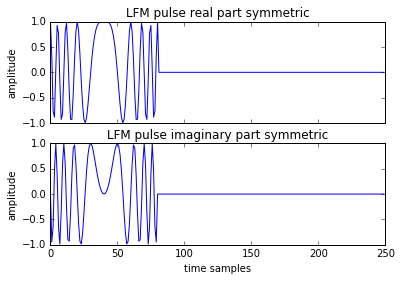

In [10]:
ps = generateSymmetricPulsedLFM(A0=1, Tp=4e-6, fc=fc, alpha7s=2e12, tot_samples=250, signal_samples=80)
plot_LFM_pulses(ps, type7s='symmetric')

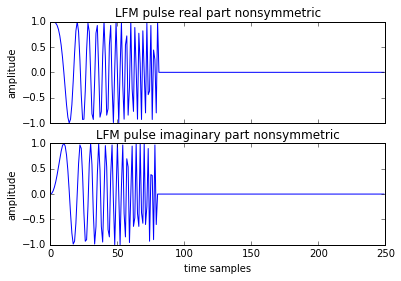

In [11]:
ps = generateNonsymmetricPulsedLFM(A0=1, Tp=4e-6, fc=fc, alpha7s=2e12, tot_samples=250, signal_samples=80)
plot_LFM_pulses(ps, type7s='nonsymmetric')

# Final function selected for the use in the SAR simulator

In [12]:
# a single function to generate either symmetric either asymmetric pulses
def generatePulsedLFM(A0, Tp, fc, alpha7s, tot_samples, fs, symmetric=True):
    Ttot = float(tot_samples) / fs
    t = np.linspace(0, Ttot, tot_samples, endpoint=False)
    mask = abs((t-Tp/2)/Tp)<=0.5
    mask = mask.astype(int)
    if symmetric:
        p = (A0*np.exp(1j*2*np.pi*fc*(t-Tp/2) + 1j*np.pi*alpha7s*(t-Tp/2)*(t-Tp/2))) * mask
    else: 
        p = (A0*np.exp(1j*2*np.pi*fc*t + 1j*np.pi*alpha7s*t*t)) * mask
    return p

In [13]:
def plot_LFM_pulses(p):
    x = range(0, len(p))
    y1 = p.real
    y2 = p.imag
    # Two subplots, the axes array is 1-d
    f, axarr = plt.subplots(2, sharex=True)
    axarr[0].plot(x, y1)
    axarr[0].set_title('LFM pulse real part ')
    axarr[1].set_title('LFM pulse imaginary part ')
    axarr[1].plot(x, y2)
    axarr[1].set_xlabel('time samples')
    axarr[0].set_ylabel('amplitude')
    axarr[1].set_ylabel('amplitude')

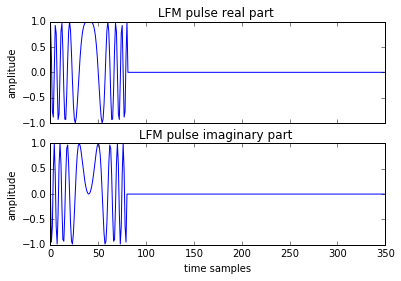

In [14]:
ps = generatePulsedLFM(A0=1, Tp=4e-6, fc=fc, alpha7s=2e12, tot_samples=350, fs=fs, symmetric=1)
plot_LFM_pulses(ps)